In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

ImportError: cannot import name 'animation'

In [ ]:
try:
    from sklearn.metrics import calinski_harabasz_score
except ImportError:
    from sklearn.metrics import calinski_harabaz_score

In [5]:
df = pd.read_csv('iris.csv')
df.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [65]:
from pyclustertend import hopkins
hopkins(df, df.shape[0])

ImportError: cannot import name 'calinski_harabasz_score'

In [6]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [66]:
x = df.iloc[:, [0,1,2,3]].values

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [62]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

[1 4 4 4 1 1 4 1 4 4 1 4 4 4 1 1 1 1 1 1 1 1 1 4 4 4 1 1 1 4 4 1 1 1 4 4 1
 1 4 1 1 4 4 1 1 4 1 4 1 4 3 0 0 2 0 2 0 2 0 2 2 0 2 0 2 0 0 2 2 2 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 0 0 0 2 0 2 2 0 2 2 2 0 0 0 2 2 3 0 3 0 3 3 2 3 0 3 3
 0 3 2 0 3 0 3 3 2 3 0 3 0 3 3 0 0 0 3 3 3 0 0 0 3 3 0 0 3 3 3 0 3 3 3 0 0
 3 0]


In [63]:
kmeans5.cluster_centers_

array([[ 0.42443129, -0.35727844,  0.6115949 ,  0.5610145 ],
       [-0.74922133,  1.43007001, -1.29759846, -1.22142131],
       [-0.33846225, -1.30137905,  0.13982007,  0.05879571],
       [ 1.40150837,  0.23797961,  1.17888943,  1.24668215],
       [-1.35230687,  0.11914427, -1.31439133, -1.29749445]])

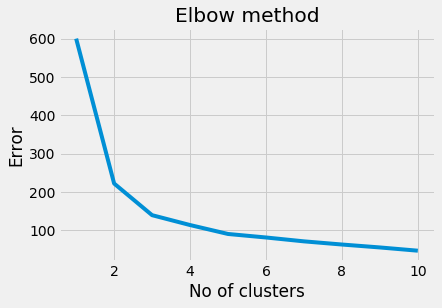

In [28]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [29]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


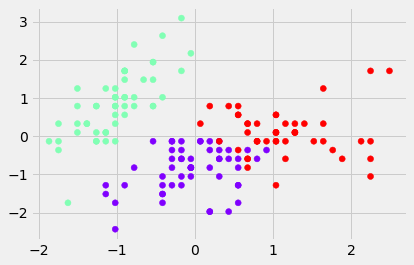

In [30]:
plt.scatter(x[:,0],x[:,1],c=y_kmeans3,cmap='rainbow')

In [31]:
kmeans3.inertia_

139.8204963597497

In [32]:
kmeans.n_iter_

4

In [33]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}

In [34]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

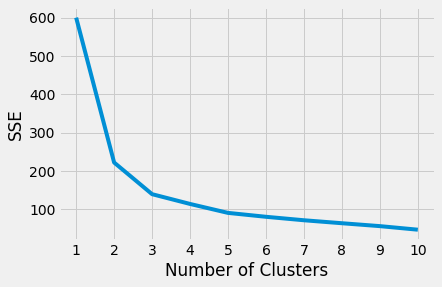

In [35]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [36]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow


3

In [37]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x)
    score = silhouette_score(x, kmeans.labels_)
    silhouette_coefficients.append(score)

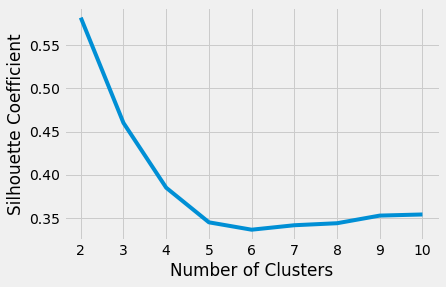

In [38]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()